# SD212: Graph mining
## Lab 1: Sampling nodes and edges

You will learn to:
* use the networkx package
* sample nodes / edges

## 1. The networkx package

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

### First graph

In [5]:
# Building the graph
graph = nx.Graph(name = "My first graph")
graph.add_edge(1,2)
graph.add_edge(2,3)

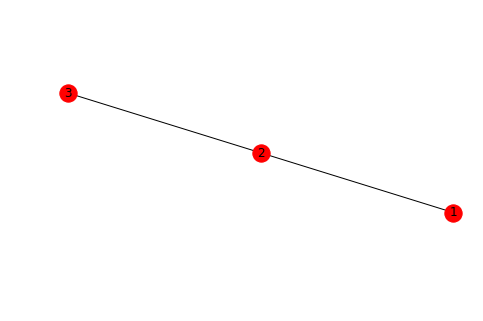

In [6]:
# Visualization
nx.draw(graph, with_labels=True)
plt.show()

In [7]:
# Summary
print(nx.info(graph))

Name: My first graph
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


In [8]:
# List of nodes 
nodes = list(graph.nodes())
print(nodes)

[1, 2, 3]


In [9]:
# Iterator on nodes
for u in graph.nodes():
    print (u)

1
2
3


In [10]:
# First node through the list / the iterator
nodes_iter = iter(graph.nodes())
print(nodes[0])
print(next(nodes_iter))

1
1


## To do

* Get the second node using the list and the iterator

In [11]:
print(next(nodes_iter))
print(nodes[1])

2
2


* Get the first edge using the list of edges and the iterator on edges

In [12]:
edges = list(graph.edges)
print(edges[0])

(1, 2)


In [13]:
edges_iter = iter(graph.edges)
print(next(edges_iter))

(1, 2)


### Second graph

In [14]:
# Building the graph
social_graph = nx.Graph(name = "A social graph")
social_graph.add_edge('Albert','Barbara')
social_graph.add_edge('Albert','Carol')
social_graph.add_edge('Barbara','Dan')
social_graph.add_edge('Albert','Dan')

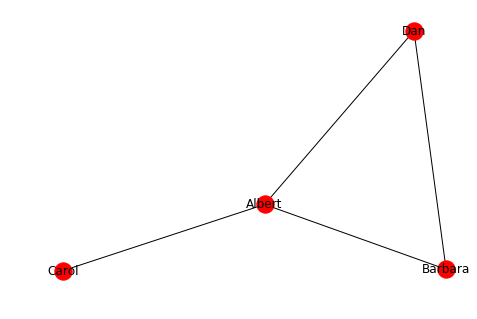

In [15]:
# Visualization
nx.draw(social_graph, with_labels = True)
plt.show()

In [16]:
# Summary
print (nx.info(social_graph))

Name: A social graph
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


In [17]:
# List of nodes / edges
print (social_graph.nodes())
print (social_graph.edges())

['Albert', 'Barbara', 'Carol', 'Dan']
[('Albert', 'Barbara'), ('Albert', 'Carol'), ('Albert', 'Dan'), ('Barbara', 'Dan')]


In [18]:
# Node degree
social_graph.degree('Albert')

3

In [19]:
# Neighbors
for u in social_graph.neighbors('Albert'):
    print(u)

Barbara
Carol
Dan


In [20]:
# List of node degrees
degrees = [social_graph.degree(u) for u in social_graph.nodes()]
degrees

[3, 2, 1, 2]

In [21]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print (u, social_graph[u])

Albert {'Barbara': {}, 'Carol': {}, 'Dan': {}}
Barbara {'Albert': {}, 'Dan': {}}
Carol {'Albert': {}}
Dan {'Barbara': {}, 'Albert': {}}


In [22]:
# Modifying the graph
edges = [('Barbara','Evelyn'),('Evelyn','Dan')]
social_graph.add_edges_from(edges)

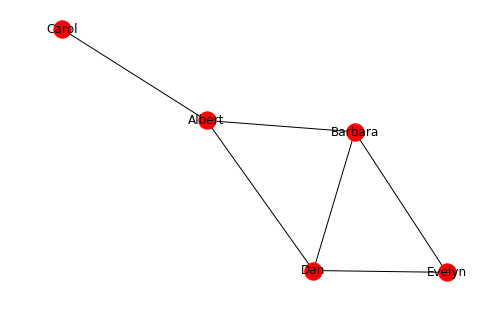

In [23]:
# Visualization
nx.draw(social_graph,with_labels = True)
plt.show()

### Layout

The layout allows you to visualize the graph (in 2D).

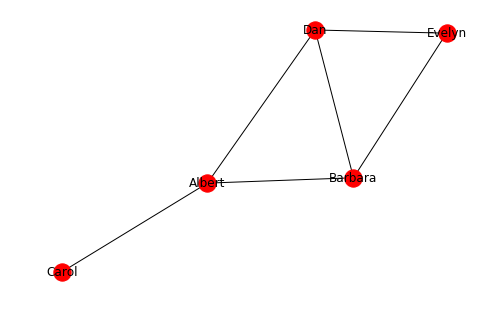

In [24]:
# Layout based on springs (default layout)
pos = nx.spring_layout(social_graph)
nx.draw(social_graph,pos,with_labels = True)
plt.show()

In [25]:
print (pos)

{'Albert': array([-0.32414631, -0.13115624]), 'Barbara': array([ 0.35645849, -0.11521239]), 'Carol': array([-1.        , -0.39508393]), 'Dan': array([0.1777137 , 0.32549269]), 'Evelyn': array([0.78997411, 0.31595988])}


Observe that two instances of the spring layout are generally not the same!

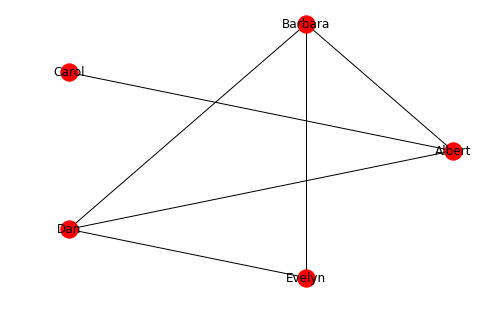

In [26]:
# Another layout
pos = nx.circular_layout(social_graph)
nx.draw(social_graph,pos,with_labels = True)
plt.show()

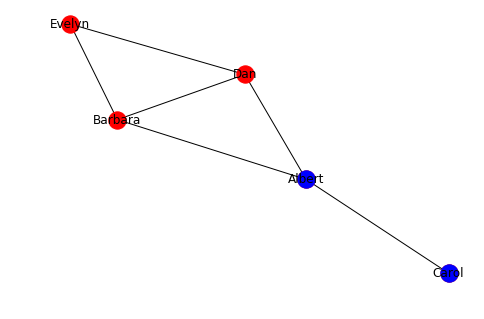

In [27]:
# Changing the color of some nodes
pos = nx.spring_layout(social_graph)
nx.draw(social_graph,pos,with_labels = True)
nodes = nx.draw_networkx_nodes(social_graph,pos,nodelist = ['Albert','Carol'],node_color='blue')
plt.show()

### Node labels

In most cases, the $n$ nodes are indexed from 0 to $n-1$. The name of each node (if any) is then stored as a label.

In [28]:
# Indexing nodes
names = list(social_graph.nodes())
social_graph = nx.convert_node_labels_to_integers(social_graph)

In [29]:
# Adding names as labels
for i in social_graph.nodes():
    social_graph.node[i]['name'] = names[i]

In [32]:
from tabulate import tabulate

ModuleNotFoundError: No module named 'tabulate'

In [33]:
for u in social_graph.nodes():
    print (u, social_graph.node[u])

0 {'name': 'Albert'}
1 {'name': 'Barbara'}
2 {'name': 'Carol'}
3 {'name': 'Dan'}
4 {'name': 'Evelyn'}


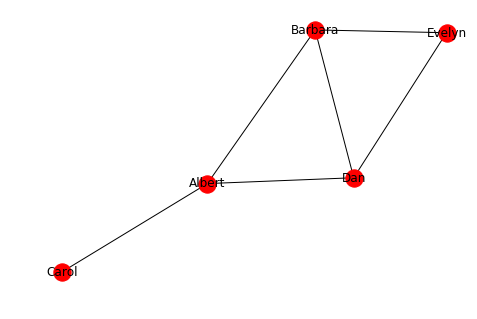

In [34]:
names = nx.get_node_attributes(social_graph,'name')
nx.draw(social_graph, labels = names)
plt.show()

In [35]:
# Adding other labels
women = ['Barbara', 'Carol','Evelyn']

for u in social_graph.nodes():
    if social_graph.node[u]['name'] in women:
        social_graph.node[u]['gender'] = 'Female'
    else:
        social_graph.node[u]['gender'] = 'Male'

In [36]:
for u in social_graph.nodes():
    print (u, social_graph.node[u])

0 {'name': 'Albert', 'gender': 'Male'}
1 {'name': 'Barbara', 'gender': 'Female'}
2 {'name': 'Carol', 'gender': 'Female'}
3 {'name': 'Dan', 'gender': 'Male'}
4 {'name': 'Evelyn', 'gender': 'Female'}


In [37]:
# Store the positions as labels
pos = nx.spring_layout(social_graph)
for u in social_graph.nodes():
    social_graph.node[u]['pos'] = tuple(pos[u])

In [38]:
for u in social_graph.nodes():
    print (u, social_graph.node[u])

0 {'name': 'Albert', 'gender': 'Male', 'pos': (0.2567991659595468, -0.32219345108540043)}
1 {'name': 'Barbara', 'gender': 'Female', 'pos': (0.011990813457403703, 0.44075189768239653)}
2 {'name': 'Carol', 'gender': 'Female', 'pos': (0.7813695145895042, -1.0)}
3 {'name': 'Dan', 'gender': 'Male', 'pos': (-0.4267992065160395, 0.09263260108595527)}
4 {'name': 'Evelyn', 'gender': 'Female', 'pos': (-0.6233602874904157, 0.7888089523170485)}


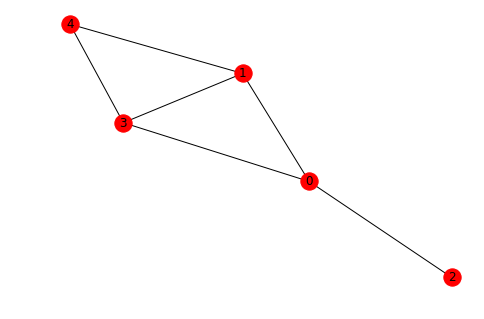

In [39]:
pos = nx.get_node_attributes(social_graph,'pos')
nx.draw(social_graph,pos,with_labels = True)
plt.show()

### Edge labels

In [40]:
# Adding weights
for u,v in social_graph.edges():
    social_graph[u][v]['weight'] = np.random.randint(1,10)

In [ ]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print (u, social_graph[u])

In [ ]:
# Visualization with edge weights
weights = nx.get_edge_attributes(social_graph, 'weight')
nx.draw_networkx_edge_labels(social_graph, pos, edge_labels = weights)
nx.draw(social_graph, pos, labels = names)
plt.show()

In [ ]:
# Visualization with edge widths = edge weights
weights_list = [weights[e] for e in social_graph.edges()]
nx.draw(social_graph, pos, labels = names, width = weights_list, edge_color = 'grey')
plt.show()

In [ ]:
# Adding edge labels
categories = ['Family', 'Work', 'Friend']
for u,v in social_graph.edges():
    social_graph[u][v]['category'] = str(np.random.choice(categories))

In [ ]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print (u, social_graph[u])

In [ ]:
# Visualization with categories
nx.draw(social_graph, pos, labels = names, node_color = 'grey')

color_map = {'Family': 'b', 'Work': 'r', 'Friend': 'g'}

categories = nx.get_edge_attributes(social_graph, 'category')

edgelists = {}
for u, category in categories.items():
    edgelists.setdefault(category, []).append(u)

nx.draw(social_graph, pos, labels = names, node_color = 'gray')
for category in edgelists:
    edges = nx.draw_networkx_edges(social_graph, pos, edgelist = edgelists[category], width = 4, edge_color = color_map[category])
plt.show()

### Directed graphs

In [41]:
# Building the graph
edges = [(1,3),(3,2),(1,3),(1,4),(3,5),(2,4),(2,5),(4,3),(5,4),(5,6),(6,1)]
digraph = nx.from_edgelist(edges, create_using=nx.DiGraph())
digraph.graph['name'] = "A directed graph"

In [42]:
# Summary (observe the type of graph)
print(nx.info(digraph))

Name: A directed graph
Type: DiGraph
Number of nodes: 6
Number of edges: 10
Average in degree:   1.6667
Average out degree:   1.6667


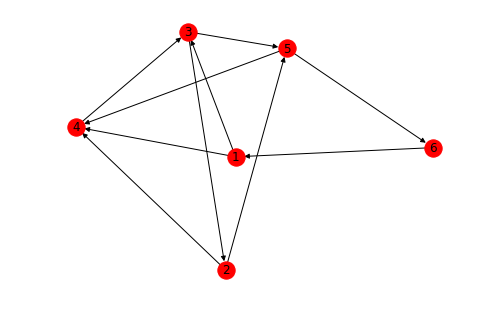

In [43]:
# Visualization
nx.draw(digraph,with_labels = True)
plt.show()

### Writing and reading graphs

The `networkx` package allows you to write and read graphs in many formats. We will use the `graphml` format.

Complex data structures like `tuples` of `lists` are not supported. 

## To do

* Replace the label `pos` by two labels, one per coordinate.

In [ ]:
pos = nx.spring_layout(digraph)

# pos_x = {}
# pos_y = {}

for u, coordinate in pos.items():
#     digraph.nodes[u]['pos_x'] = coordinate[0]
#     digraph.nodes[u]['pos_y'] = coordinate[1]
#     pos_x[u]=float(coordinate[0])
#     pos_y[u]=float(coordinate[1])
    digraph.nodes(data=True)[u]['pos_x'] = float(coordinate[0])
    digraph.nodes(data=True)[u]['pos_y'] = float(coordinate[1])


# nx.set_node_attributes(digraph, pos_x)
# nx.set_node_attributes(digraph, pos_y)

* Save the graph in graphml format.

In [ ]:
nx.write_graphml(digraph, "digraph.graphml")

* Read the graph (use the type `int` for node indices) and check the labels.

In [ ]:
graph = nx.read_graphml("digraph.graphml", node_type = int)
print(nx.info(graph))
print(graph.nodes)

## 2. Datasets

You will now work on two real datasets, OpenStreet and Openflights, to be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab1.zip).

### OpenStreet

OpenStreet is a graph of streets in the center of Paris. Nodes correspond to intersections. The graph is directed due to one-way streets. Weights correspond to distances between intersections  (in meters). Source: [Open Street Map](http://openstreetmap.fr)

In [44]:
# First download the datasets!
openstreet = nx.read_graphml("openstreet.graphml", node_type = int)

In [45]:
print (nx.info(openstreet))

Name: Openstreet
Type: DiGraph
Number of nodes: 6025
Number of edges: 8170
Average in degree:   1.3560
Average out degree:   1.3560


In [46]:
# Get positions
pos_x = nx.get_node_attributes(openstreet,'pos_x')
pos_y = nx.get_node_attributes(openstreet,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openstreet.nodes()}

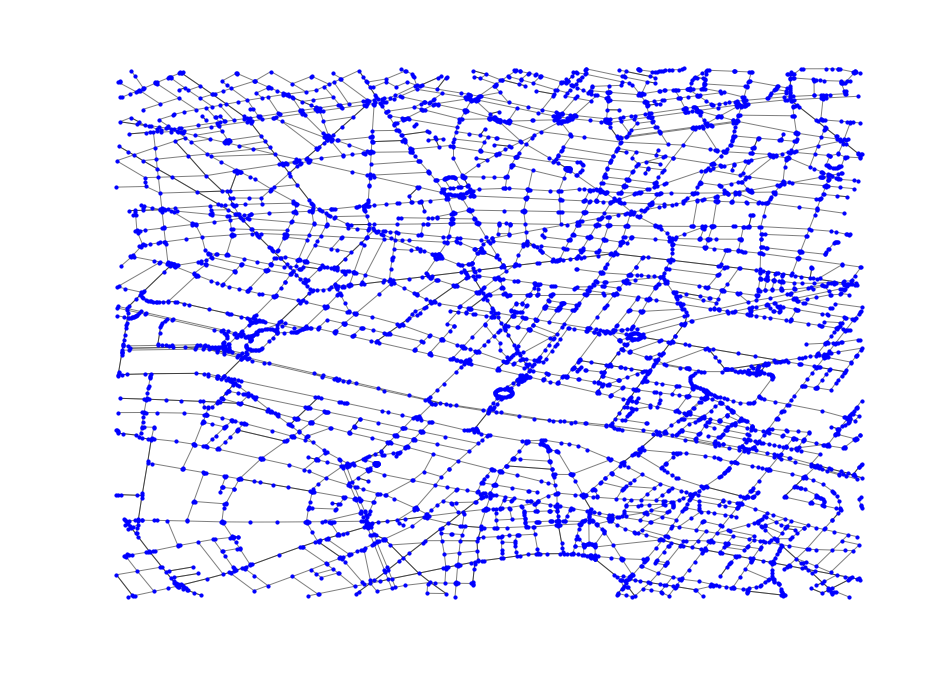

In [47]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size = 10, node_color = 'b')
edges = nx.draw_networkx_edges(openstreet, pos, arrows = False, alpha = 0.5)
plt.show()

In [48]:
# A shortest path 
path = nx.shortest_path(openstreet, 0, 1000, weight = 'weight')

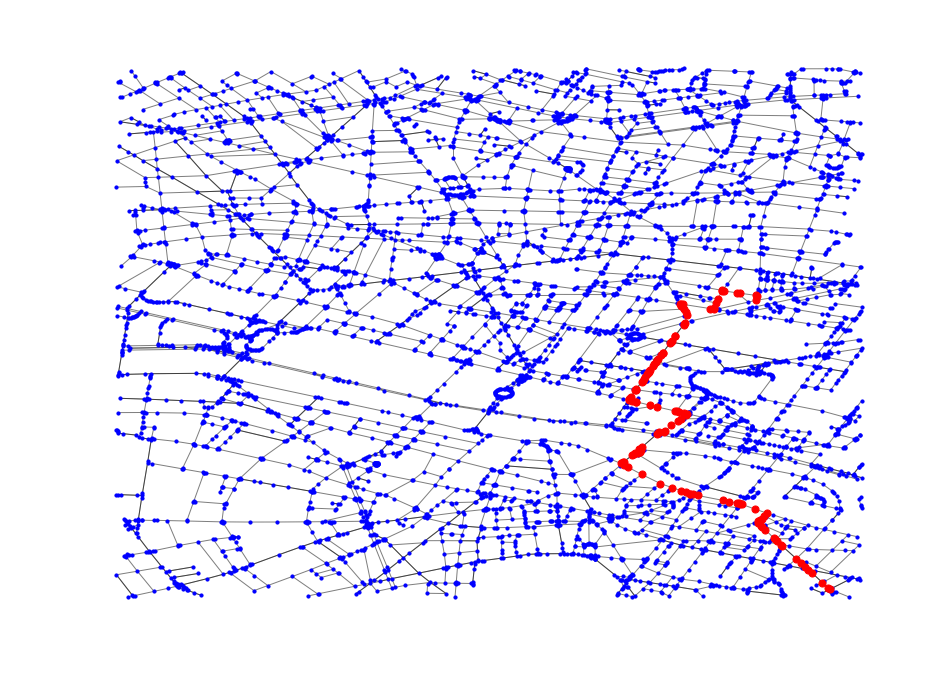

In [49]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openstreet, pos, nodelist = path, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(openstreet, pos, arrows = False, alpha = 0.5)
plt.show()

## To do

* Show the shortest path from Pantheon to Gare Saint Lazare.

In [50]:
pantheon = 370
gare_saint_lazare = 4873
shortest_path = nx.shortest_path(openstreet,source=pantheon,target=gare_saint_lazare)
categories = ['shortest_path', 'else']
shortest_path_edges = []

#Filling the edges vector
for i in range(1,len(shortest_path)-1):
    shortest_path_edges.append( (shortest_path[i-1], shortest_path[i]) ) 

#Labelling the shortest_path and all the others nodes
for (u,v) in openstreet.edges():
    if( (u,v) in shortest_path_edges):
        openstreet[u][v]['category'] = categories[0]
    else:
        openstreet[u][v]['category'] = categories[1]

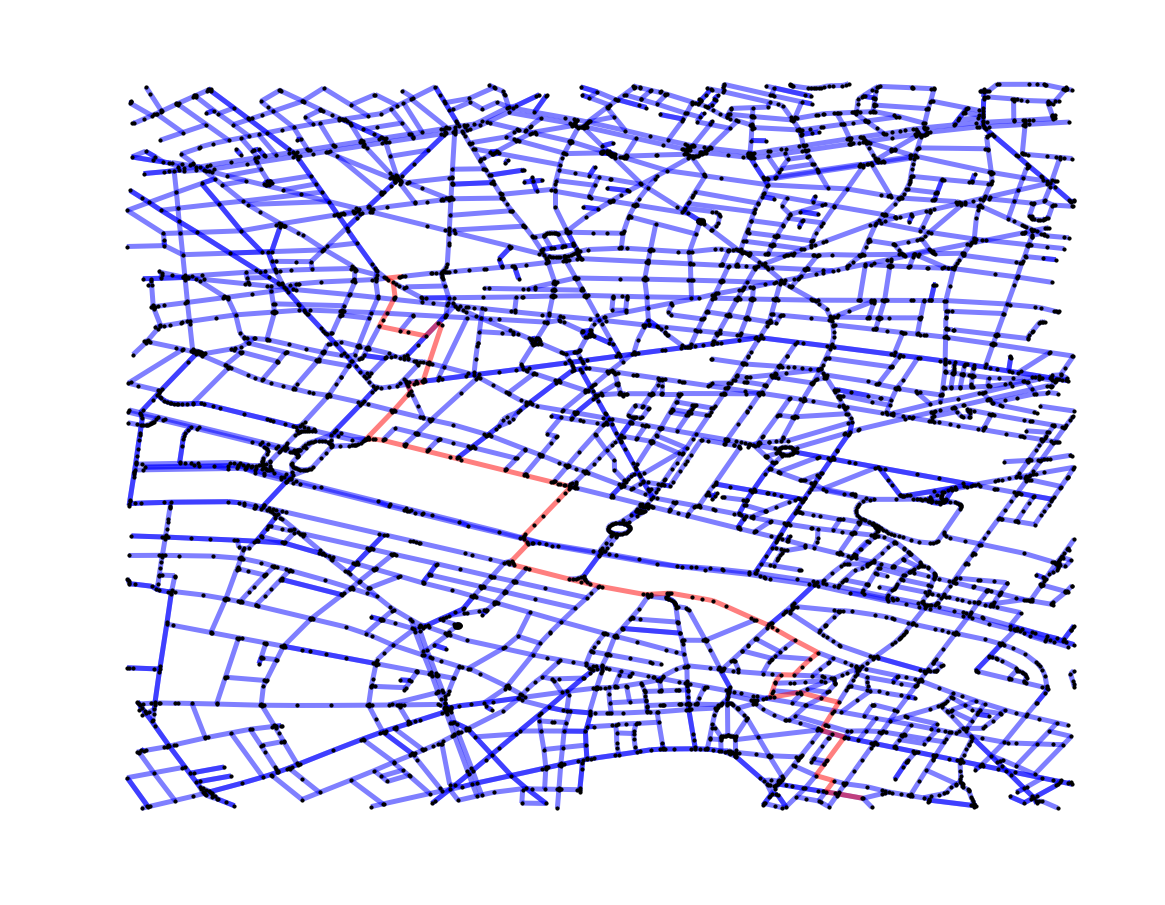

In [51]:
color_map = {'shortest_path': 'r', 'else': 'b'}
categories = nx.get_edge_attributes(openstreet, 'category')
edgelists = {}

for u, category in categories.items():
    edgelists.setdefault(category, []).append(u)

plt.figure(figsize=(20,16))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size = 10, node_color = 'black')
for category in edgelists:
    edges = nx.draw_networkx_edges(openstreet, pos, edgelist = edgelists[category], width = 5, edge_color = color_map[category], arrows = False, alpha = 0.5)
plt.show()

## OpenFlights

OpenFlights is the graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Source: [Open Flight](http://openflights.org)

In [52]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

In [70]:
print(nx.info(openflights))

Name: Openflights
Type: Graph
Number of nodes: 3097
Number of edges: 18193
Average degree:  11.7488


In [54]:
# Get node from (partial) name

def get_node_from_name(name):
    list_nodes = []
    for u in openflights.nodes():
        if openflights.node[u]['name'].find(name) >= 0:
            list_nodes.append(u)
    return list_nodes

for u in get_node_from_name('Charles de Gaulle'):
    print (u,openflights.node[u]['name'])

622 Charles de Gaulle International Airport


In [55]:
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}

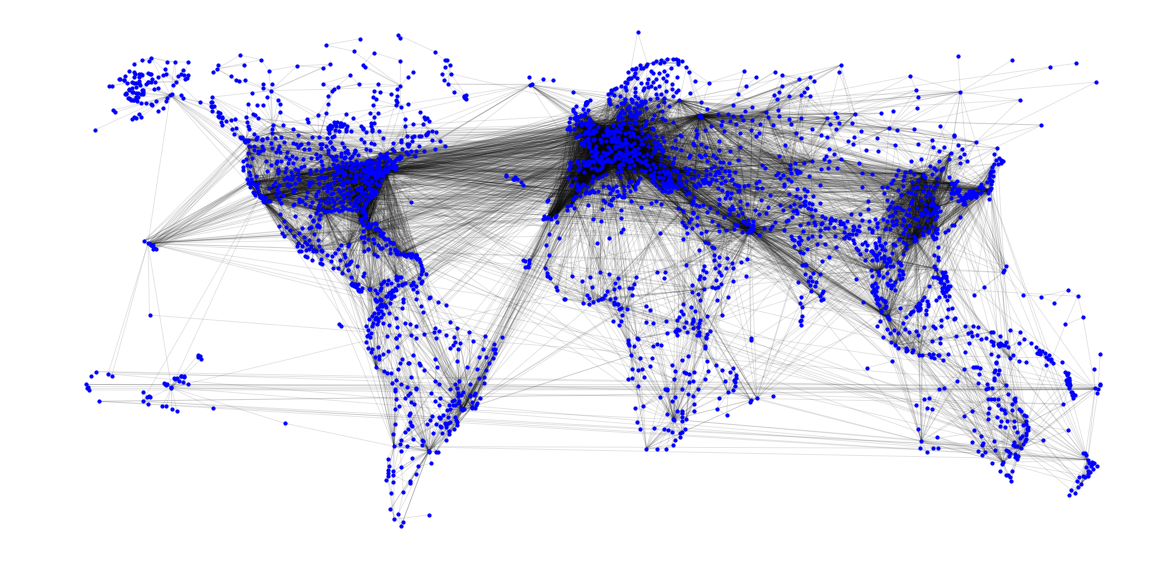

In [56]:
# Visualization
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_edges(openflights, pos, alpha = .1)
plt.show()

## To do

### * List the top-10 airports in number of flights and show them on the map.

In [66]:
from collections import Counter
openflights.nodes()[0]['name']
origin = []
for edge in openflights.edges():
    origin.append(edge[0])
count = Counter(origin)
most_common = count.most_common(10)

Goroka Airport


In [58]:
most_common

[(189, 222),
 (280, 182),
 (194, 176),
 (251, 143),
 (253, 143),
 (193, 141),
 (183, 134),
 (277, 132),
 (240, 126),
 (1618, 125)]

In [59]:
most_common_node = []
for i in range(10):
    most_common_node.append(most_common[i][0])
print(most_common_node)
top_airport = []
for node in most_common_node:
    top_airport.append(openflights.nodes[node]['name'])
print(top_airport)

[189, 280, 194, 251, 253, 193, 183, 277, 240, 1618]
['Frankfurt am Main International Airport', 'Amsterdam Airport Schiphol', 'Munich International Airport', 'London Gatwick Airport', 'London Heathrow Airport', 'Düsseldorf International Airport', 'Brussels Airport', 'London Stansted Airport', 'Manchester Airport', 'Beijing Capital International Airport']


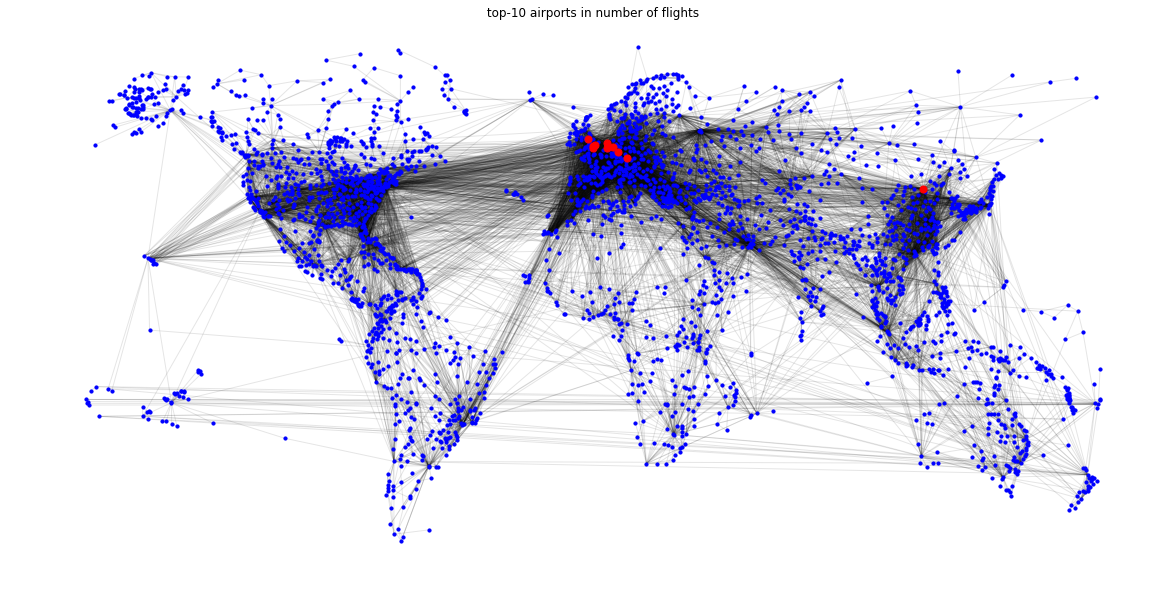

In [60]:
# Visualization
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openstreet, pos, nodelist = most_common_node, node_size = 50, node_color = 'r')
nx.draw_networkx_edges(openflights, pos, alpha = .1)
plt.title(' top-10 airports in number of flights ')
plt.show()

## Trié par degree centrality: The degree centrality for a node v is the fraction of nodes it is connected to

In [67]:
degree_centrality = nx.degree_centrality(openflights)
#We sort the nodes by degree centrality: The degree centrality for a node v is the fraction of nodes it is connected to
sorted_degrees = []
for w in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
    sorted_degrees.append( (w, degree_centrality[w]) )
#print(sorted_degrees)
#We keep only the 10 biggest airports node ids and the 100 biggest airports degree centrality
top10_airports = sorted_degrees[:10]
top100_airports = sorted_degrees[:100]

top10_nodes = []
top10_names = []
for i in range(10):
    airport = top10_airports[i][0]
    top10_nodes.append(airport)
    top10_names.append(openflights.node[airport]['name'])
    
print(top10_names)

top_100 = 0
total_proportion = 0
for i in range(len(sorted_degrees)):
    if (i < 100):
        top_100 += top100_airports[i][1]
        total_proportion += top100_airports[i][1]
    else:
        total_proportion += sorted_degrees[i][1]
        
print("\nTop10 airport represent "+str(top_100/total_proportion*100)+"% of total proportion")

['Frankfurt am Main International Airport', 'Charles de Gaulle International Airport', 'Amsterdam Airport Schiphol', 'Atatürk International Airport', 'Hartsfield Jackson Atlanta International Airport', "Chicago O'Hare International Airport", 'Beijing Capital International Airport', 'Munich International Airport', 'Dallas Fort Worth International Airport', 'Domodedovo International Airport']

Top10 airport represent 33.61732534491434% of total proportion


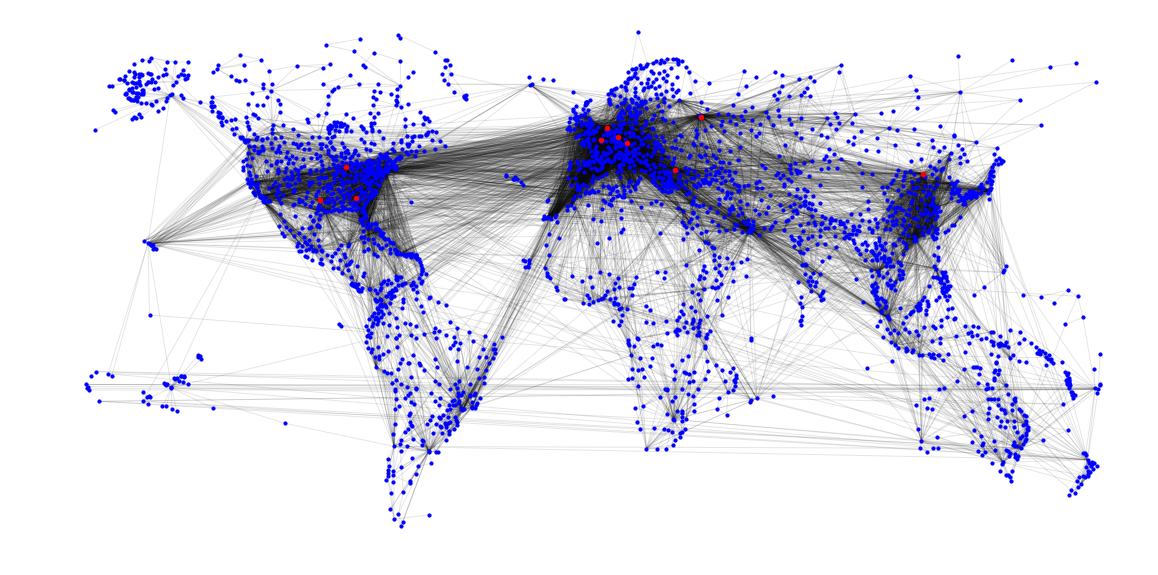

In [68]:
#Visualization    
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openflights, pos, nodelist = top10_nodes, node_color='r', node_size = 20, labels = top10_names)
nx.draw_networkx_edges(openflights, pos, alpha = .1)
plt.show()

### * Which proportion of traffic is generated by the top-100 airports?

In [ ]:
top_100 = count.most_common(100)
top_100_sum = 0
for edge,value in top_100:
    top_100_sum+=value
top_100_sum

In [ ]:
total_sum = sum(count.values())

In [ ]:
proportion = top_100_sum/total_sum *100 
proportion

### * List the top-10 airports in number of flights and show them on the map.

In [ ]:
degres = openflights.degree
degres = sorted(openflights.degree, key=lambda x: x[1], reverse=True)
top_10 = degres[:10]

most_common_node = []
for i in range(10):
    most_common_node.append(top_10[i][0])
print(most_common_node)

top_airport = []
for node in most_common_node:
    top_airport.append(openflights.nodes[node]['name'])
print(top_airport)

In [ ]:
# Visualization
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openstreet, pos, nodelist = most_common_node, node_size = 50, node_color = 'r')
nx.draw_networkx_edges(openflights, pos, alpha = .1)
plt.title(' top-10 airports in number of flights ')
plt.show()

### * Which proportion of traffic is generated by the top-100 airports?

In [ ]:
# top_100 = count.most_common(100)
top_100_sum = 0
total_sum = 0
for degre in range(len(degres)):
    total_sum+=degres[degre][1]
    if degre<100:
        top_100_sum+=degres[degre][1]
print(top_100_sum)
print(total_sum)
print(top_100_sum/total_sum * 100)

# 3. Node and edge sampling

In the rest of the lab, we work on the OpenFlights dataset.

## To do

List:
* 10 random nodes 
* 10 random neighbors
* 10 random ends of random edges

In each case, show both the name of the airport and the degree of the corresponding node.

In [71]:
from tabulate import tabulate
def print_name_degree(graph, node):
    res = []
    name = graph.nodes()[node]['name']
    degree = graph.degree()[node]
    res.append([node, name, degree])
    print(tabulate(res))

ModuleNotFoundError: No module named 'tabulate'

In [ ]:
# Shuffling nodes
nodes = list(openflights.nodes())
np.random.shuffle(nodes)
print (nodes[:10])

for node in nodes[:10]:
    print_name_degree(openflights, node)

In [ ]:
# Shuffling edges
edges = list(openflights.edges())
np.random.shuffle(edges)
print (edges[:10])

In [ ]:
for edge in edges[:10]:
    print(edge[1])
    

## To do 

* Compute the mean and standard deviation of the degrees.
* Display the degree distribution. Can it be considered as a power law?
* Compute the mean and standard deviation of the degree of a random neighbor.
* Compute the mean and standard deviation of the degree of a node sampled from the edges. 
* Interpret the results.
* (optional) Do the same with nodes / edges sampled in proportion to their weights and interpret the results.

In [ ]:
degrees = openflights.degree
degrees_values = []
for deg in degrees:
    degrees_values.append(deg[1])

In [ ]:
import numpy as np
mean = np.mean(degrees_values)
print(mean)
std = np.std(degrees_values)
print(std)

In [ ]:
deg_hist = plt.hist(degrees_values, bins=200)

==> Nomal law centered in 0 with a very low std or exponential law